In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [87]:
df.shape

(14999, 10)

In [88]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [89]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder()

# Fit and transform the 'salary' column
encoded_salary = ohe.fit_transform(df[['salary']])

# Get feature names from the encoder categories
feature_names = ohe.get_feature_names_out(['salary'])

# Convert the encoded sparse matrix into a DataFrame
encoded_salary_df = pd.DataFrame(encoded_salary.toarray(), columns=feature_names)

# Concatenate the encoded 'salary' DataFrame with the original DataFrame
df = pd.concat([df, encoded_salary_df], axis=1)

# Drop the original 'salary' column if needed
df.drop(columns=['salary'], inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,sales,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,sales,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0.0,1.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,support,0.0,1.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,support,0.0,1.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,support,0.0,1.0,0.0


In [90]:
X = df.drop(columns='Department',inplace=True)
X = df.drop(columns=['left'])  # Assuming 'left' is the target variable

In [91]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.029708,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.020628,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.008726,-0.002504,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.007101,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.039953,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009040,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.120929,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.076756,-0.082832,0.040985
salary_high,0.029708,-0.020628,-0.008726,-0.007101,0.039953,0.009040,-0.120929,0.076756,1.000000,-0.292560,-0.260274
salary_low,-0.047415,0.005221,-0.002504,-0.001050,-0.040110,-0.006813,0.134722,-0.082832,-0.292560,1.000000,-0.847144


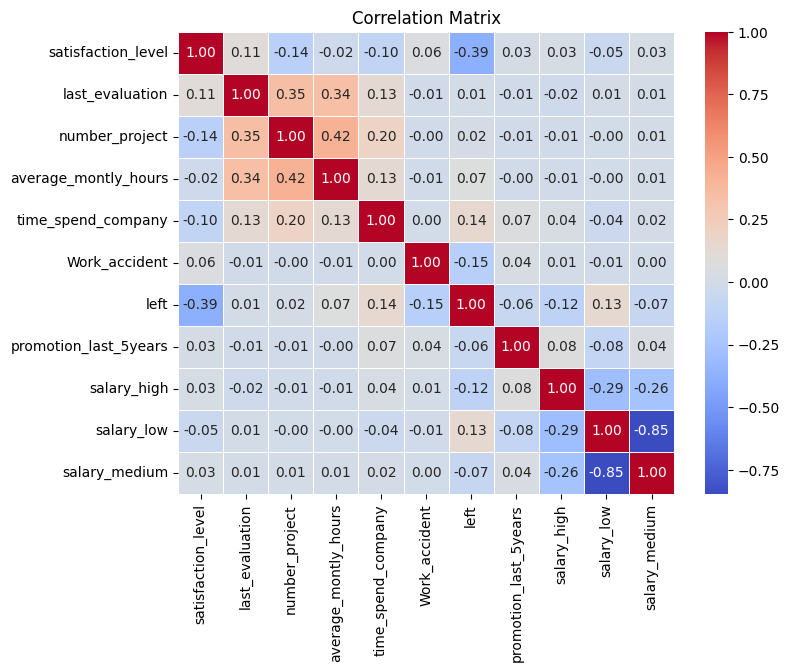

In [92]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [93]:
df_final = df[['time_spend_company','left']]
df_final.head()

,time_spend_company,left
0,3,1
1,6,1
2,4,1
3,5,1
4,3,1


In [94]:
#splitting the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,df.left,test_size=0.2)

In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [96]:
model.fit(X_train,Y_train)

C:\Users\gouar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
model.score(X_test,Y_test)

0.796